In [1]:
# imports
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import time
from IPython import display

%matplotlib inline

In [25]:
# random small-world networks
s = 3 # for reproducibility

# parameters -> change these to generate random graphs with (somewhat) different properties
n = 20 # number of nodes
k = 4 # WS: number of nearest neighbors to join
p = .001 # WS: probability of: adding a new edge (NWS), rewiring an existing edge (WS)
m = 5 # BA: number of edges to attach from a new node to an existing node (1 <= m < n)
p_hk = .001 # HK: probability of adding a triangle after adding a random edge

# create the actual random graph
#nws_network = nx.newman_watts_strogatz_graph(n,k,p,seed=s)
#ws_network = nx.watts_strogatz_graph(n,k,p,seed=s)
cws_network = nx.connected_watts_strogatz_graph(n,k,p,seed=s) # for guaranteeing a connected graph
#ba_network = nx.barabasi_albert_graph(n,m,seed=s)
#hk_network = nx.powerlaw_cluster_graph(n,m,p_hk,seed=s) # BA model w/ addl prob of triangles at each time step
#kleinberg_network = nx.navigable_small_world_graph() # ???

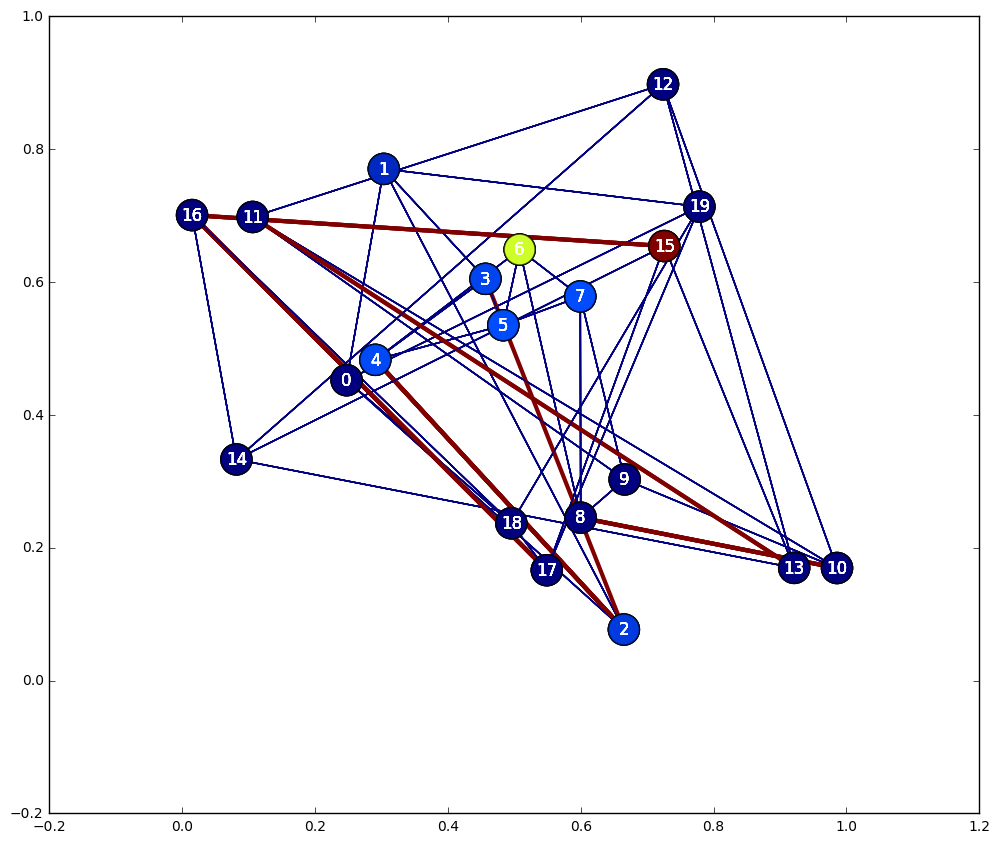

In [ ]:
G = cws_network # choose a network type to visualize
pos = nx.random_layout(G)

# set up drawing
fig, ax = plt.subplots(1,1,figsize=(12,12))
ax.set_aspect('equal'); ax.hold(True)
pos = nx.random_layout(G)

# set edge attributes
explored = dict()
for e in G.edges(): explored[e] = 1
nx.set_edge_attributes(G,'explored',explored)

# set node attributes
discovered = dict()
for n in G.nodes(): discovered[n] = 0
nx.set_node_attributes(G,'discovered',discovered)

# determine random start and target nodes
start = random.randint(1,n); target = random.randint(1,n)
discovered[start] = 3; discovered[target] = 5
nx.set_node_attributes(G,'discovered',discovered)

visited = list(); visited.insert(0,start); t = 0
while len(visited) > 0:
    current = visited.pop(0)
    if discovered[current] != 1:
        if current == target: break
        if current != start: 
            discovered[current] = 1; nx.set_node_attributes(G,'discovered',discovered)
        if (old,current) in explored: 
            explored[(old,current)] = 3; nx.set_edge_attributes(G,'explored',explored)
        elif (current,old) in explored: 
            explored[(current,old)] = 3; nx.set_edge_attributes(G,'explored',explored)
            
        for n in G.neighbors(current):
            if discovered[n] == 0: visited.insert(0,n)
    old = current
    
    # get current attributes
    node_list,node_discovered = zip(*nx.get_node_attributes(G,'discovered').items())
    edge_list,edge_explored = zip(*nx.get_edge_attributes(G,'explored').items())
    
    # visualize current step
    nx.draw_networkx_nodes(G,pos,node_size=500,node_color=node_discovered,alpha=.5)
    nx.draw_networkx_labels(G,pos,font_size=12,font_color='white')
    nx.draw_networkx_edges(G,pos,edge_color=edge_explored,width=1*np.array(edge_explored))
    display.display(fig)
    display.clear_output(wait=True)